In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import seaborn as sns
from astropy.cosmology import WMAP9 as cosmo
import pandas as pd
import matplotlib.ticker as ticker


import Window_Function
import HERA_hack_FG
import pspec
import make_universe

plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams['ytick.labelsize']=11
plt.rcParams['xtick.labelsize']=11



%load_ext autoreload
%autoreload 2

In [3]:
0.0349066*cosmo.comoving_distance(8.524)

<Quantity 325.46209363 Mpc>

In [225]:
################## TELESCOPE STUFF ##################
dishes = np.array([[0,0],[0,-57.39295490174667],[30,0],[0,60],[2,55]])#,[47,2],[45,23],[56,21],[30,115],[48,52],[100,100],[0,200],[115,30],[33,31],[49,11],[21,24],[25,6],[56,9],[12,13],[16,17],[38,17],[60,14],[26,28],[6,45],[3,37],[12,55],[200,0],[145,13],[134,65],[139,163]])
data = np.loadtxt('/Users/hannahfronenberg/desktop/MSC1/HERA Noise/hera_positions_staged/antenna_positions_128.dat')
hera_bls = data[:,:-1]

npix_row,npix_col = 30,30

#dishes = np.array([[0,0],[33.33,0],[0,70.71],[33.33, 70.71]])
acorner = np.array([[120,270],[122,280],[120,280],[122,270]])

HERA = HERA_hack_FG.telescope(dishes, latitude=-30, channel_width=0.1, Tsys=300, beam_width=2, beam = 'gaussian')

obs = HERA_hack_FG.observation(telescope = HERA, n_days = 1, freq = 150, delta_t = 0.01 ,corners = acorner, beam_sigma_cutoff=2.5, sky_shape = (npix_row,npix_col), norm = True, pbeam = True)

obs.compute_M(None,None)


Ly = 100
Lx = 100

################### WINDOW STUFF ###############


window = Window_Function.Window_Function(obs.Mmat,obs.sky_shape[0],obs.sky_shape[1],obs.delta_phi,obs.delta_theta,150,40,norm = False)


In [250]:
window.circular_bin()

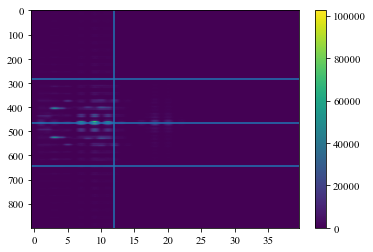

In [251]:
plt.imshow(window.W_col_collapse, aspect = 'auto')
plt.axvline(x = 12)
plt.axhline(y = 465)
plt.axhline(y = 283)
plt.axhline(y = 643)
plt.colorbar()

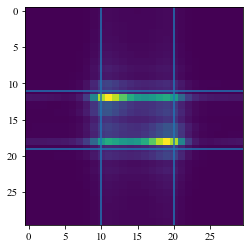

In [252]:
plt.imshow(np.reshape(window.W_col_collapse[:,12], (30,30)))

plt.axvline(x = 10)
plt.axhline(y = 19)

plt.axvline(x = 20)
plt.axhline(y = 11)

In [253]:
np.sqrt(window.k_row[3]**2 + window.k_col[3]**2)

0.06344809339171852

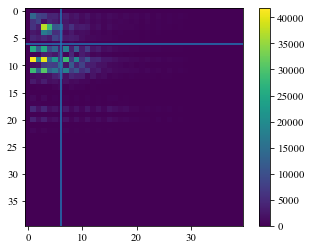

In [254]:
plt.imshow(window.W_collapse)
plt.colorbar()
plt.axvline(x = 6)
plt.axhline(y = 6)


In [231]:
print(window.W_collapse[12,12])

2274.998820864715


In [232]:
window.bin_window()

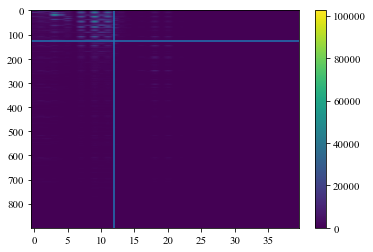

In [233]:
plt.imshow(window.W_col_collapse, aspect = 'auto')
plt.axvline(x = 12)
plt.axhline(y = 126)
plt.colorbar()

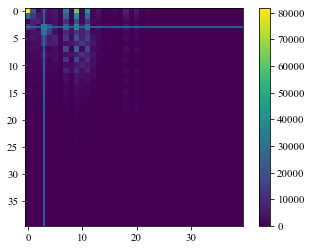

In [234]:
plt.imshow(window.W_collapse)
plt.colorbar()
plt.axvline(x = 3)
plt.axhline(y = 3)

In [235]:
print(window.W_collapse[12,12])

2274.9988208647155


In [114]:
obs.bl_times

bl_tot = np.sqrt((obs.bl_times[0,0]**2)+(obs.bl_times[0,1]**2) + (obs.bl_times[0,2]**2))

print(obs.bl_times[0])
print(bl_tot)

print((38.26*(15))/cosmo.comoving_distance(8.524))

[-87.3929549   43.69647745 -75.68451906]
123.59230207791039
0.06155216884527996 1 / Mpc



print(obs.bdotr.shape)
wavelength = (3e8)/float(obs.freq*1e6) # in m

bnbn_tot = [] 
for j in range(900):
    bn_bn = []
    for i in range(900):
        minus = obs.bdotr[0,j]-obs.bdotr[0,i]
        bn_bn.append(minus)
    bnbn_tot.append(bn_bn)

print(obs.bl_times)
bnbn_tot = np.asarray(bnbn_tot)


analytic_M  = np.exp((2* np.pi * -1j* ((bnbn_tot)/wavelength)))
plt.imshow(np.imag(obs.Mmat - analytic_M.T))
plt.colorbar()

In [160]:
np.sqrt(5)*30

67.0820393249937

In [6]:
baselines = np.sqrt(HERA.bls[:,0]**2 +HERA.bls[:,1]**2)
min(baselines)


81.16589520671754

In [161]:
largest_angle = 2/30
smallest_angle = 2/67.0820393249937

In [162]:
largest_scale = largest_angle*cosmo.comoving_distance(8.524)
smallest_scale = smallest_angle*cosmo.comoving_distance(8.524)
print(largest_scale,smallest_scale)
print(cosmo.h)

621.5865454907347 Mpc 277.9819539233096 Mpc
0.6931999999999999


In [163]:
k_smallest = (2*np.pi)/smallest_scale
k_largest = (2*np.pi)/largest_scale

In [164]:
length = (2*np.pi)/( -0.01933817978045078)

In [165]:
theta = length/cosmo.comoving_distance(8.524).value

In [166]:
2/theta

-57.39295490174667

In [167]:
k_smallest

<Quantity 0.02260285 1 / Mpc>

In [168]:
k_largest

<Quantity 0.0101083 1 / Mpc>

In [70]:
2/0.06

33.333333333333336

In [71]:
2/0.02

100.0

In [16]:
1000/(np.sqrt(2))

707.1067811865474

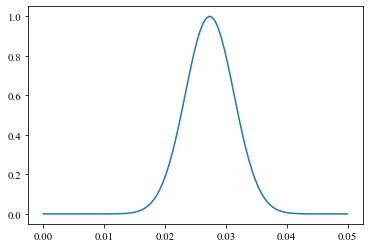

In [115]:
#restrict power spectrum only to the observable modes!
def ps(x):
    mu, sigma = 0.027348316,0.004
    return  np.exp( - (x - mu)**2 / (2 * sigma**2))


x = np.linspace(0,0.05,100)

# plt.axvline(x=0.01069)
# plt.axvline(x=0.032)
plt.plot(x,ps(x))


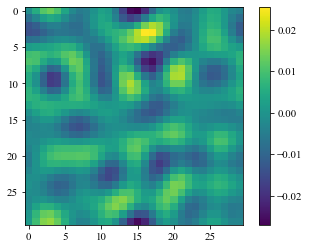

In [116]:
################### MAKE UNIVERSE STUFF ################
Ly = 1000
Lx = 1000

make_uni = make_universe.universe(ps,obs.sky_shape[0],obs.sky_shape[1],Ly,Lx, mean = 0) #100 Mpc by 100Mpc

universe = make_uni.make_2D_universe()

stacked_sky = np.hstack(universe.T)

plt.imshow(universe)
plt.colorbar()


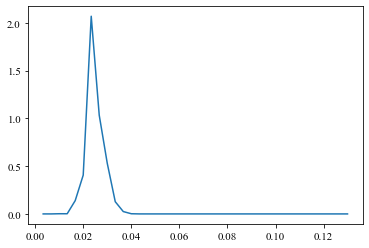

In [117]:

power_spec = pspec.Power_Spectrum(universe,1000 ,1000,40,False) #100 Mpc by 100Mpc --> have to scale fft I think 
pk_real = power_spec.compute_2D_pspec()
plt.plot(pk_real[0],pk_real[1])

(3811119140310665.5+0.016253125957317163j) (3811119140310665.5-0.01996596598786623j) (3811119140310665.5-0.034543293538952316j)


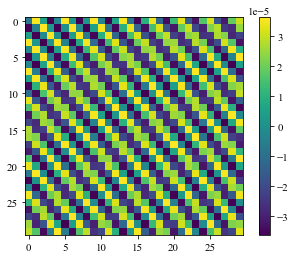

In [118]:
plt.imshow(np.real(np.reshape(obs.Amat[1], (30,30))))
plt.colorbar()


print(max(obs.norm[1]),max(obs.norm[300]),max(obs.norm[:,456]))

In [119]:
obs.compute_M(None,None)

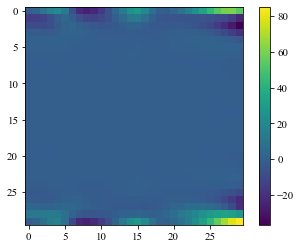

In [180]:
########## CONVOLVE THE MAP ############

sky = np.dot(np.real(obs.Mmat),stacked_sky)  #np.real(obs.convolve_map(stacked_sky,None,None))
square_sky = np.reshape(sky,(30,30)).T
mean_temp = np.mean(sky)
plt.imshow(np.real(square_sky))
plt.colorbar()




[4.06123852e+00 6.93476190e+00 5.24085236e+01 8.17564964e+01
 2.47603199e+02 2.31790426e+03 2.33735129e+02 1.06659780e+02
 3.94786894e+01 3.51464204e+01 1.04993761e+01 3.37081553e+01
 1.28223554e+01 9.73099066e+00 3.70827157e+00 4.05212307e+00
 3.72416826e+00 5.87179911e-01 4.84759618e+00 5.03374426e-01
 2.34973456e+00 1.24133637e+00 1.51671426e+00 1.04417028e+00
 1.26770683e+00 1.37204426e+00 2.02811404e-01 8.29363959e-01
 1.01720273e-01 3.04757282e-02 2.22330693e-02 1.62580367e-02
 1.23425156e-02 1.09292424e-02 1.21341581e-02 1.04539738e-02
 9.94360883e-03 9.65382172e-03 0.00000000e+00]


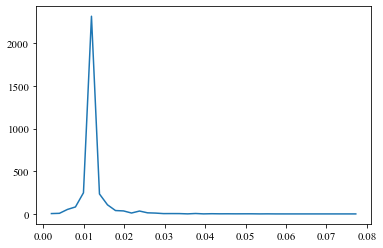

In [121]:
######### POWER SPECTRUM STUFF ###########

Lx_hera = cosmo.comoving_distance(8.5).value*obs.delta_phi*obs.sky_shape[0]
Ly_hera = cosmo.comoving_distance(8.5).value*obs.delta_theta * obs.sky_shape[1]

power_spec = pspec.Power_Spectrum(square_sky,Ly_hera ,Lx_hera,40,False) #100 Mpc by 100Mpc --> have to scale fft I think 
pk_hera = power_spec.compute_2D_pspec()

plt.plot(pk_hera[0],pk_hera[1])

print(pk_hera[1])



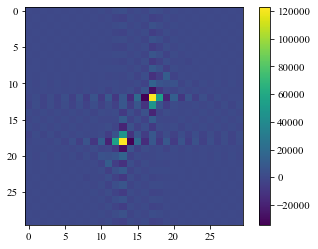

In [122]:
sky_fft = np.fft.fftshift(np.fft.fft2(np.fft.fftshift(square_sky))) 

factor = obs.delta_theta * cosmo.comoving_distance(8.524).value*cosmo.comoving_distance(8.524).value*obs.delta_phi

plt.imshow(np.real(sky_fft)*factor)

plt.colorbar()

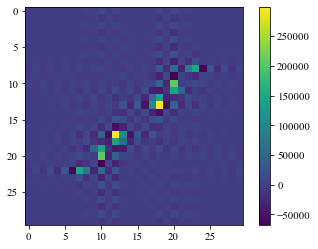

In [123]:
sky_fft = (30*30)*np.fft.fftshift(np.fft.ifft2(np.fft.fftshift(np.reshape(np.real(obs.Mmat[:,1]),(30,30)))))*obs.delta_theta*cosmo.comoving_distance(8.524)*obs.delta_theta*cosmo.comoving_distance(8.524)
freqs = np.fft.fftshift(np.fft.fftfreq(30, d = obs.delta_theta*cosmo.comoving_distance(8.524)))*(2*np.pi)
plt.imshow(np.real(sky_fft))

plt.colorbar()

[-0.05225338 -0.05598577] 1 / Mpc


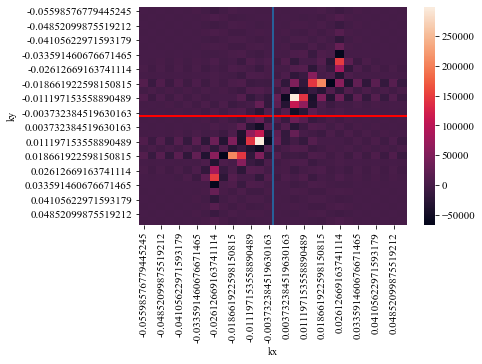

In [124]:
kk = np.concatenate(np.dstack(np.meshgrid(freqs, freqs)))

print(kk[1,:])

df_obs = pd.DataFrame.from_dict(np.array([kk[:,0],kk[:,1],np.reshape(np.real(sky_fft),(30*30,))]).T)
df_obs.columns = ['ky','kx','window']



pivotted_obs= df_obs.pivot('ky','kx','window')

ax = plt.axes()

sns.heatmap(pivotted_obs,ax =ax)
ax.axhline(y = np.where(freqs == 0)[0][0], color = 'r',linewidth=2)
ax.axvline(x = np.where(freqs == 0)[0][0])
ax.set_title('', y = 1.04, fontsize = 24)
# ax.xaxis.set_major_locator(plt.MaxNLocator(6))
# ax.yaxis.set_major_locator(plt.MaxNLocator(6))
xlabels = [item.get_text() for item in ax.get_xticklabels()]
ylabels = [item.get_text() for item in ax.get_yticklabels()]
# ax.set_xticklabels([str(round(float(label), 2)) for label in xlabels])
# ax.set_yticklabels([str(round(float(label), 2)) for label in ylabels])

plt.show()

#GOOD! except a little confused why you get both positive and negative kx contributions. It doesn't 
#really mater since they both give you the same k_mag. But do the math to be sure this is what you're meant to get

[-0.05225338 -0.05598577] 1 / Mpc


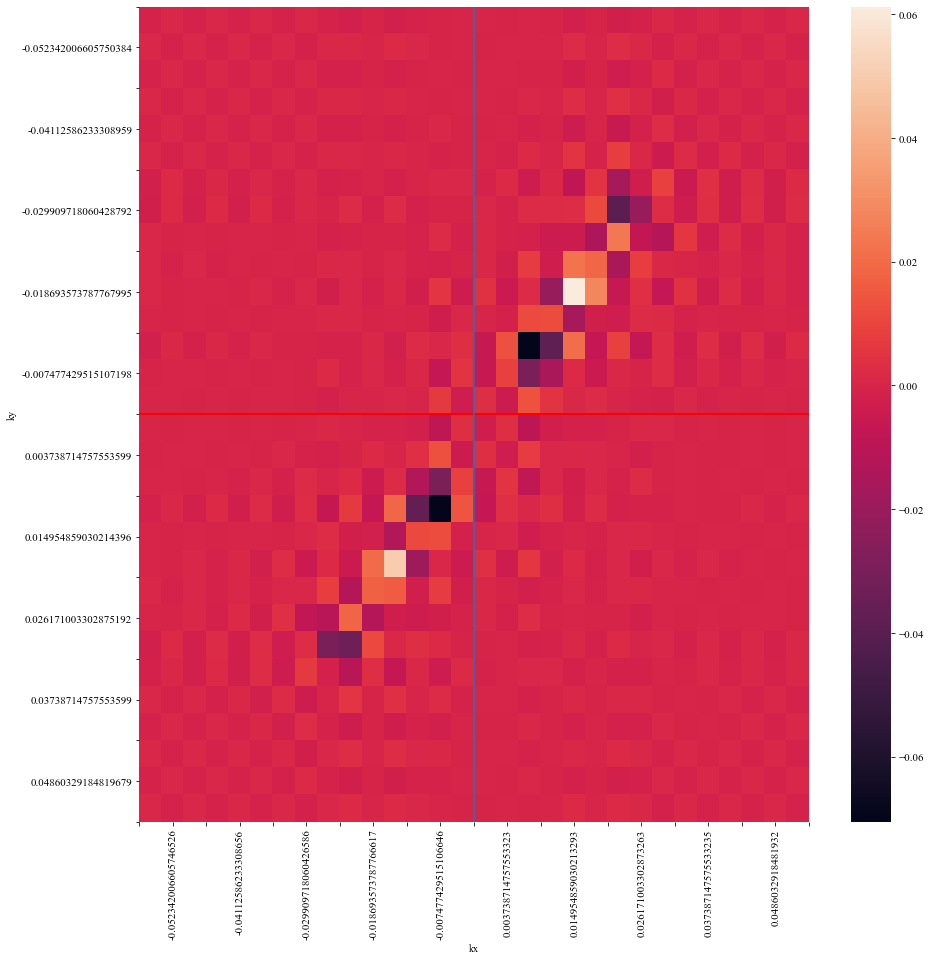

In [125]:

kk_window = np.concatenate(np.dstack(np.meshgrid(window.k_col, window.k_row)))

print(kk[1,:])

df_obs = pd.DataFrame.from_dict(np.array([kk_window[:,1],kk_window[:,0],np.real(np.reshape(window.M_tilde[1],(30*30,)))]).T)
df_obs.columns = ['ky','kx','window']



pivotted_obs= df_obs.pivot('ky','kx','window')
fig, ax = plt.subplots(1,1, figsize = (15,15))
ax = plt.axes()

sns.heatmap(pivotted_obs,ax =ax)
ax.axhline(y = np.where(freqs == 0)[0][0], color = 'r',linewidth=2)
ax.axvline(x = np.where(freqs == 0)[0][0])
ax.set_title('', y = 1.04, fontsize = 24)
ax.xaxis.set_major_locator(ticker.MaxNLocator(29))
ax.yaxis.set_major_locator(ticker.MaxNLocator(29))
# xlabels = [item.get_text() for item in ax.get_xticklabels()]
# ylabels = [item.get_text() for item in ax.get_yticklabels()]
# ax.set_xticklabels([str(round(float(label), 2)) for label in xlabels])
# ax.set_yticklabels([str(round(float(label), 2)) for label in ylabels])

plt.show()

In [126]:
print(window.k_row),np.sqrt(0.01495**2 +0.01869**2 )

[-0.05608072 -0.05234201 -0.04860329 -0.04486458 -0.04112586 -0.03738715
 -0.03364843 -0.02990972 -0.026171   -0.02243229 -0.01869357 -0.01495486
 -0.01121614 -0.00747743 -0.00373871  0.          0.00373871  0.00747743
  0.01121614  0.01495486  0.01869357  0.02243229  0.026171    0.02990972
  0.03364843  0.03738715  0.04112586  0.04486458  0.04860329  0.05234201]


(None, 0.023933629060382797)

In [245]:
nreal = 700

sum_spec_obs = np.zeros(39)
sum_spec_real = np.zeros(39)


Lx_hera = cosmo.comoving_distance(8.5).value*obs.delta_phi*obs.sky_shape[0]
Ly_hera = cosmo.comoving_distance(8.5).value*obs.delta_theta*obs.sky_shape[1]



for i in range(nreal):
    #make fake universe
    universe = make_uni.make_2D_universe()
    
    #compute its pspec
    power_spec = pspec.Power_Spectrum(universe.T,1000 ,1000,40,False) #100 Mpc by 100Mpc --> have to scale fft I think 
    pk_real = power_spec.compute_2D_pspec()
    sum_spec_real += pk_real[1] #find the average spec 
    
    #observe the fake universe
    stacked_sky = np.hstack(universe.T)
    sky = np.real(obs.convolve_map(stacked_sky,None,None))
    square_sky = np.reshape(sky,(npix_row,npix_col)).T
    
    #calculate output spec
    power_spec_telescope = pspec.Power_Spectrum(square_sky.T,Ly_hera ,Lx_hera,nbins = 40,log = False) #100 Mpc by 100Mpc --> have to scale fft I think 
    pk_telescope = power_spec_telescope.compute_2D_pspec()
    sum_spec_obs += pk_telescope[1] #average

averaged_obs = sum_spec_obs/nreal
averaged_real = sum_spec_real/nreal


In [246]:
window_input_spec = np.array([pk_real[0],averaged_real])


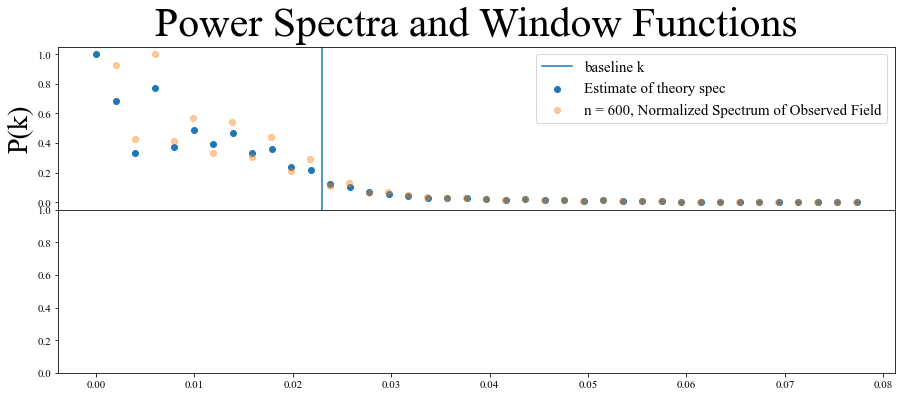

In [248]:
window = Window_Function.Window_Function(obs.Mmat,obs.sky_shape[0],obs.sky_shape[1],obs.delta_phi,obs.delta_theta,150,40,norm = False)


kk_universe,edges_universe ,pk_universe = window.compute_pspec_estimate(window_input_spec)



fig, ax = plt.subplots(2, 1, figsize = (15,6),sharex='col', sharey='row', gridspec_kw={'hspace': 0, 'wspace': 0})

# ax[0].scatter(kk_universe,ps(kk_universe), label = 'Theory spec')
# ax[0].scatter(kk,pk/max(pk), label = 'Estimate of theory spec -- 50th percentile ')
# ax[0].scatter(pk_real[0],pk_real[1], label = 'epower spectum before instrument')
ax[0].scatter(edges_universe[:40],pk_universe/max(pk_universe), label = 'Estimate of theory spec')
# ax[0].scatter(window.k_sorted,np.real(np.dot(window.window_sorted,ps(window.k_sorted)))/max(np.real(np.dot(window.window_sorted,ps(window.k_sorted)))),label = 'Full window spec')
# ax[0].scatter(pk_hera[0],pk_hera[1], alpha = 0.4,label = 'Spectrum of Observed Field')
ax[0].scatter(pk_hera[0],averaged_obs/max(averaged_obs), alpha = 0.4 ,label = 'n = 600, Normalized Spectrum of Observed Field')


ax[0].set_ylabel('P(k)',fontsize = 28)
ax[0].set_title('Power Spectra and Window Functions',fontsize = 42 , y = 1.03)
ax[0].axvline(x=0.023, label = "baseline k")
ax[0].legend(fontsize = 15)
color = ['k','b','g','r','y','c','m','gold','w','grey','lime','brown','violet','olive','coral','skyblue','linen','khaki','silver','lightsalmon','blueviolet','thistle','peru','tan','aquamarine','slategray','navy','lightgreen','darkred','tomato']
indices = [1,3,5,7,9,11,13,15,17,19,21,23,25,27,29]

# print(len(color))
# for i in range(window.window_binned.shape[0]):
#     ax[1].plot(edges_universe[1:],np.log10(window.window_binned[i]),c = color[i])
#     ax[1].axvline(window.k_to_plot[i], c = color[i])


# ax[1].legend(['Every other window function'], fontsize = 18, handletextpad=0, handlelength=0)
# ax[1].set_xlabel('k',fontsize = 28)
# ax[1].set_ylabel('W(k)',fontsize = 28)



In [249]:
print('image spectrum peak:',max(pk_hera[1]))

print('window estimate peak:',max(pk_universe))

image spectrum peak: 2317.9042585233633
window estimate peak: 80429.11424681508


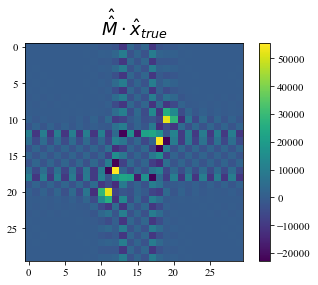

In [141]:
x_tilde_true = np.fft.fftshift(np.fft.fft2(np.fft.fftshift(universe*(window.delta_theta*window.delta_phi))))
k = np.fft.fftfreq(30, d = window.delta_theta)

x_tilde_true = np.reshape(x_tilde_true, (30*30))

x_tilde_obs = np.reshape(np.matmul(window.M_tilde, x_tilde_true), (30,30)).T

plt.imshow(np.real(x_tilde_obs))
plt.title('$\hat{\hat{M}}\cdot \hat{x}_{true}$', fontsize = 18, y = 1.01)
plt.colorbar()

Text(0.5, 1.0, '$M\\mathcal{F}^{-1}\\cdot \\mathcal{F}\\{{x_{true}}\\}$')

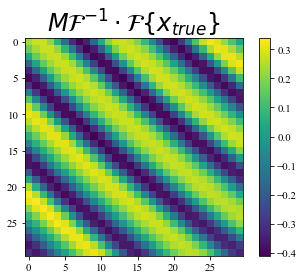

In [142]:
x_obs = np.reshape(np.real(np.dot(window.Mbar,x_tilde_true)), (30,30)).T

plt.imshow(x_obs)
plt.colorbar()
plt.title('$M\mathcal{F}^{-1}\cdot \mathcal{F}\{{x_{true}}\}$', fontsize = 24)


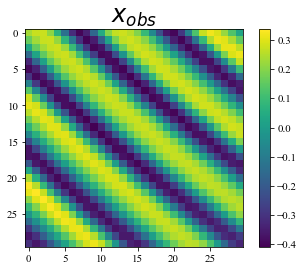

In [143]:
plt.imshow(square_sky)
plt.title('$x_{obs}$', fontsize = 24)
plt.colorbar()

Text(0.5, 1.0, 'Residual')

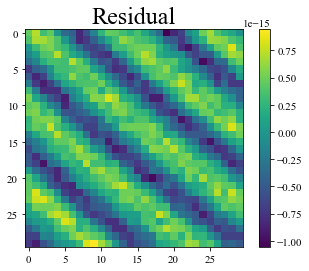

In [144]:
plt.imshow(x_obs - square_sky)
plt.colorbar()
plt.title('Residual', fontsize = 24)

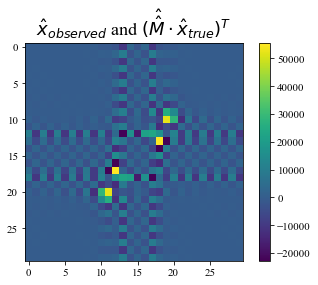

In [145]:
fft_data_w = np.fft.fftshift(np.fft.fft2(np.fft.fftshift(x_obs*(window.delta_theta*window.delta_phi))))
fft_data_h = np.fft.fftshift(np.fft.fft2(np.fft.fftshift(square_sky*(window.delta_theta*window.delta_phi))))

# plt.imshow(np.real(x_tilde_obs))
# plt.imshow(np.real(fft_data_w))
plt.imshow(np.real(fft_data_h))
plt.title('$ \hat{x}_{observed}$ and $(\hat{\hat{M}}\cdot \hat{x}_{true})^T$ ', fontsize = 18, y = 1.01)
plt.colorbar()

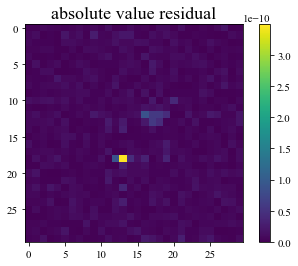

In [146]:
plt.imshow(np.abs(np.imag(x_tilde_obs) - np.imag(fft_data_w)))
plt.title('absolute value residual', fontsize = 18)
plt.colorbar()

In [32]:
abs_square_h = np.conj(fft_data_h)*fft_data_h
abs_square_w = np.reshape(np.dot(window.window, (np.conj(x_tilde_true)*x_tilde_true)),(34,34))

plt.imshow(np.real(abs_square_h))#/(window.L_x*window.L_y))

plt.colorbar()

ValueError: cannot reshape array of size 900 into shape (34,34)

In [33]:
plt.imshow(np.real(abs_square_w))#/(window.L_x*window.L_y))
plt.axvline(x = 13)
plt.colorbar()

NameError: name 'abs_square_w' is not defined

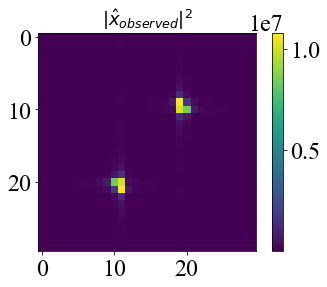

In [34]:
fft_data = np.fft.fftshift(np.fft.fft2(np.fft.fftshift(square_sky*(window.delta_theta*window.delta_phi))))


plt.imshow(np.real(np.conj(fft_data)*fft_data))
plt.title('$ |\hat{x}_{observed}|^2$', fontsize = 18, y = 1.01)
plt.colorbar()

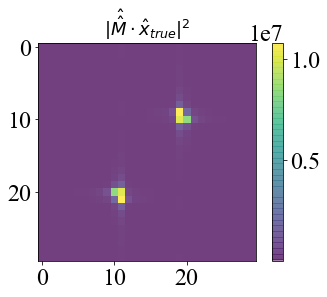

In [35]:
plt.imshow(np.real((np.conj(x_tilde_obs)*x_tilde_obs)), alpha = 0.5)

plt.imshow(np.real(np.conj(fft_data)*fft_data), alpha = 0.5)
plt.title('$|\hat{\hat{M}}\cdot \hat{x}_{true}|^2$', fontsize = 18, y = 1.01)
plt.colorbar()

In [36]:
plt.imshow(np.abs(np.reshape(np.real((np.conj(x_tilde_obs)*x_tilde_obs)), (34,34)) - (np.real(np.conj(fft_data)*fft_data))))
plt.colorbar()

ValueError: cannot reshape array of size 900 into shape (34,34)

In [37]:
x_tilde_true = np.fft.fftshift(np.fft.fft2(np.fft.fftshift(universe*(window.delta_theta*window.delta_phi))))

Mx = np.dot(window.window, np.reshape(((np.conj(x_tilde_true)*x_tilde_true)), (34*34,)))

plt.imshow(np.reshape(np.real(Mx), (34,34)))
plt.title('$|\hat{\hat{M}}|^2\cdot |\hat{x}_{true}|^2$', fontsize = 18, y = 1.01)
plt.colorbar()

ValueError: cannot reshape array of size 900 into shape (1156,)

In [38]:
V = window.L_x * window.L_y

In [39]:
dk = window.delta_ky*window.delta_ky

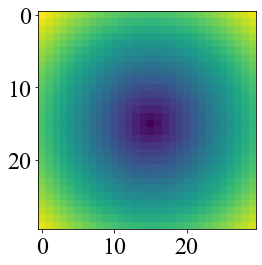

In [40]:
plt.imshow(np.reshape(window.k, (30,30)))


In [41]:
sorted_k = np.sort(window.k)

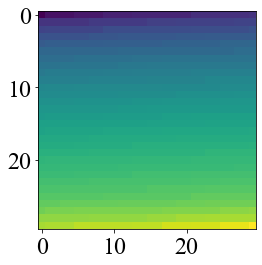

In [44]:
plt.imshow(np.reshape(sorted_k,(30,30)))

In [60]:
arr = [1,5,4,7,2,8,6,9,0,2,4,7,8,9]
to_sort = np.array([[0,1,2,3,4,5,6,7,8,9,10,11,12,13],[1,1,2,3,4,5,6,7,8,9,10,11,12,13],[2,1,2,3,4,5,6,7,8,9,10,11,12,13],[3,1,2,3,4,5,6,7,8,9,10,11,12,13],[4,1,2,3,4,5,6,7,8,9,10,11,12,13],[5,1,2,3,4,5,6,7,8,9,10,11,12,13],[6,1,2,3,4,5,6,7,8,9,10,11,12,13],[7,1,2,3,4,5,6,7,8,9,10,11,12,13],[8,1,2,3,4,5,6,7,8,9,10,11,12,13],[9,1,2,3,4,5,6,7,8,9,10,11,12,13],[10,1,2,3,4,5,6,7,8,9,10,11,12,13],[11,1,2,3,4,5,6,7,8,9,10,11,12,13],[12,1,2,3,4,5,6,7,8,9,10,11,12,13],[13,1,2,3,4,5,6,7,8,9,10,11,12,13]])

indices = np.argsort(arr) #find the indices that sort self.k
# print(indices)
J = np.take(to_sort,indices,axis = 0) #axis 0 reorders rows, this used to be M_tilde
to_sorted = np.take(J,indices,axis =1)
# print(J)
print(to_sorted)

[[ 8  8  4  9  2 10  1  6  3 11  5 12  7 13]
 [ 8  0  4  9  2 10  1  6  3 11  5 12  7 13]
 [ 8  4  4  9  2 10  1  6  3 11  5 12  7 13]
 [ 8  9  4  9  2 10  1  6  3 11  5 12  7 13]
 [ 8  2  4  9  2 10  1  6  3 11  5 12  7 13]
 [ 8 10  4  9  2 10  1  6  3 11  5 12  7 13]
 [ 8  1  4  9  2 10  1  6  3 11  5 12  7 13]
 [ 8  6  4  9  2 10  1  6  3 11  5 12  7 13]
 [ 8  3  4  9  2 10  1  6  3 11  5 12  7 13]
 [ 8 11  4  9  2 10  1  6  3 11  5 12  7 13]
 [ 8  5  4  9  2 10  1  6  3 11  5 12  7 13]
 [ 8 12  4  9  2 10  1  6  3 11  5 12  7 13]
 [ 8  7  4  9  2 10  1  6  3 11  5 12  7 13]
 [ 8 13  4  9  2 10  1  6  3 11  5 12  7 13]]


# Properly Flipping Things!

In [96]:
k = np.array([-3,-2,-1,0,1,2])

print(len(k))

#if len k is even then you want to leave the 0 entry and the len(k)/2 + 1 entry as is. 
#Then swap along the len(k/2)+1 axis for the remaining elements

print(np.where(k == 2)[0][0])

print(min(k))

6
5
-3


In [95]:
M = np.array([[1,2,3,4,5,6],[2,2,3,4,5,6],[3,2,3,4,5,6],[4,2,3,4,5,6],[5,2,3,4,5,6],[6,2,3,4,5,6],[7,2,3,4,5,6]])
print(M,M.shape)

[[1 2 3 4 5 6]
 [2 2 3 4 5 6]
 [3 2 3 4 5 6]
 [4 2 3 4 5 6]
 [5 2 3 4 5 6]
 [6 2 3 4 5 6]
 [7 2 3 4 5 6]] (7, 6)


In [97]:
M_flip_col = np.zeros_like(M)

for i in range(M.shape[1]): #might only have to go over n/2+1 (i think this might flip shit back)
    if k[i]==min(k): #most negative number case
        M_flip_col[:,i] = M[:,i]
        
    elif k[i] == 0: #0 case
        M_flip_col[:,i] = M[:,i]
    
    else: #others flip
        j = np.where(k == -k[i])[0][0]
        print(j)
        M_flip_col[:,i] = M[:,j]

5
4
2
1


In [98]:
M_flip_col

array([[1, 6, 5, 4, 3, 2],
       [2, 6, 5, 4, 3, 2],
       [3, 6, 5, 4, 3, 2],
       [4, 6, 5, 4, 3, 2],
       [5, 6, 5, 4, 3, 2],
       [6, 6, 5, 4, 3, 2],
       [7, 6, 5, 4, 3, 2]])

In [34]:
M_flip_tot = np.zeros_like(M)
for i in range(M.shape[1]): #might only have to go over n/2+1 (i think this might flip shit back)
    if k[i]==min(k): #most negative number case
        M_flip_tot[i,:] = M_flip_col[i,:]
        
    elif k[i] == 0: #0 case
        M_flip_tot[i,:] = M_flip_col[i,:]
    
    else: #others flip
        j = k.index(-k[i])
        M_flip_tot[i,:] = M_flip_col[j,:]

In [35]:
M_flip_tot

array([[1, 6, 5, 4, 3, 2],
       [6, 6, 5, 4, 3, 2],
       [5, 6, 5, 4, 3, 2],
       [4, 6, 5, 4, 3, 2],
       [3, 6, 5, 4, 3, 2],
       [2, 6, 5, 4, 3, 2]])

[[ 30  36  42]
 [ 66  81  96]
 [102 126 150]]
[[ 30  66 102]
 [ 36  81 126]
 [ 42  96 150]]


[[ 30  66 102]
 [ 36  81 126]
 [ 42  96 150]]
